In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data.csv")
df.head()

,District,State,Students,Charter_Percent,ELL_Percent,IEP_Percent,Pupil_Teacher_Ratio,Exp_Rev_Ratio,Strike
0,DETROIT PUBLIC SCHOOLS COMMUNITY DISTRICT,Michigan,45455,0.00,0.12,0.17,17.66,0.960,1
1,LOS ANGELES UNIFIED,California,633621,0.28,0.21,0.14,22.56,0.991,1
2,CITY OF CHICAGO SD 299,Illinois,378199,0.07,0.16,0.14,19.89,1.150,0
3,DADE,Florida,357249,0.24,0.21,0.10,17.11,1.023,0
4,CLARK COUNTY SCHOOL DISTRICT,Nevada,326953,0.04,0.18,0.12,20.10,0.932,0


In [3]:
X1 = df.drop("Strike",axis=1)
X2 = X1.drop("District",axis=1)
X = X2.drop("State",axis=1)
y = df["Strike"]
print(X.shape, y.shape)
print(X,y)

(6922, 6) (6922,)
      Students  Charter_Percent  ELL_Percent  IEP_Percent  \
0        45455             0.00         0.12         0.17   
1       633621             0.28         0.21         0.14   
2       378199             0.07         0.16         0.14   
3       357249             0.24         0.21         0.10   
4       326953             0.04         0.18         0.12   
5       271852             0.29         0.12         0.13   
6       216106             0.11         0.29         0.07   
7       214386             0.13         0.12         0.14   
8       200674             0.00         0.14         0.11   
9       192721             0.19         0.13         0.16   
10      187467             0.00         0.19         0.14   
11      181550             0.12         0.07         0.11   
12      178214             0.01         0.13         0.12   
13      160467             0.00         0.07         0.13   
14      159010             0.00         0.15         0.12   
15    

In [4]:
1- sum(y)/len(y)

0.930222479052297

In [5]:
class_weight = {0:0.07, 1:0.93}

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

In [7]:
X_scaled = X_scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(penalty='l2', solver='saga', class_weight=class_weight)
classifier = LogisticRegression(class_weight=class_weight)
classifier

LogisticRegression(C=1.0, class_weight={0: 0.07, 1: 0.93}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.07, 1: 0.93}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_predict = classifier.predict(X_test)

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Validation Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.42405634820299803
Validation Data Score: 0.4469314079422383


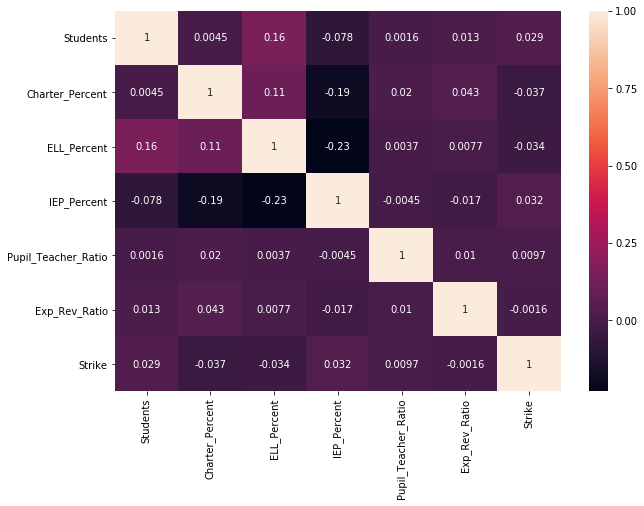

In [13]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),annot=True) 

In [14]:
train_pred = classifier.predict(X_train)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()

In [16]:
(tn, fp, fn, tp)

(2082, 3067, 122, 266)

In [17]:
test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_predict).ravel()

In [18]:
(test_tn, test_fp, test_fn, test_tp)

(551, 739, 27, 68)

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.7157894736842105

In [20]:
precision = (test_tp)/(test_tp + test_fp)
precision

0.08426270136307311

In [21]:
accuracy = (test_tp + test_tn)/(test_tp + test_tn + test_fp + test_fn)
accuracy

0.4469314079422383

In [22]:
classifier.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
classifier.predict_proba(X_scaler.transform([[10000, 0.1, 0.5, 0.25, 20, 1]]))

array([[0.62733964, 0.37266036]])

In [25]:
classifier.predict_proba(X_train)

array([[0.49437366, 0.50562634],
       [0.53238525, 0.46761475],
       [0.44312851, 0.55687149],
       ...,
       [0.52084486, 0.47915514],
       [0.56242618, 0.43757382],
       [0.47197225, 0.52802775]])

In [26]:
pickle.dump(classifier, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict(X_scaler.transform([[10000, 0.1, 0.5, 0.25, 20, 1]])))
print(model.predict_proba(X_scaler.transform([[10000, 0.1, 0.5, 0.25, 20, 1]])))

[0]
[[0.62733964 0.37266036]]
